<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**                                                                                                                     

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**


Exited — факт ухода клиента


## Подготовка данных

In [340]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [341]:
data=pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [343]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [344]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [345]:
print(909/10000*100)

9.09


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Пропуски составляют порядка 9%. Здесь у нас два варианта либо мы их вырезаем либо заполняем медианами. По моему мнению, в условиях нашей задачи можем попробовать заполнить данные медианой, тк из строки c value_counts, можем увидеть что максмимально человек является клиентом банка 10 лет , то есть медиана не должна сильно повлиять на результаты </font>
</div>

In [346]:
data.fillna(data['Tenure'].median(), inplace = True) 

In [347]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [348]:
data.duplicated().sum()

0

Явных дупликатов в данных не наблюдается

Названия столбцов записаны с использованием заглавных букв и слиянием слов в одно, исправим это

In [349]:
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [350]:
data = data.rename(columns={'creditscore':'credit_score',
                                  'numofproducts':'num_of_products',
                                  'hascrcard':'has_cr_card',
                                  'isactivemember':'is_active_member',
                                  'estimatedsalary': 'estimated_salary'
                                 })
data.head(5)


,rownumber,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Cтолбцы 

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

никак не влияют на исследование задачи, так что можем избавиться от них

In [351]:
data = data.drop(['rownumber', 'customerid', 'surname'], axis=1)
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [352]:
data['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [353]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

Неявных дубликатов в столбцах geography и gender нет


**Можем перейти к исследованию задачи**

## Исследование задачи

Преобразуем категориальные признаки geography и gender техникой OHE

In [354]:
data = pd.get_dummies(data, drop_first=True, columns=['gender', 'geography'])
data.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_Male,geography_Germany,geography_Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


Разделим данные на 3 выборки:                                                                                                  
Обучающая - 60%                                                                                                                
Валидационная и Тестовая - 20%

Целевой признак - exited

In [355]:
features = data.drop('exited', axis=1)
target = data['exited']

In [356]:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

In [357]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
                                                    target_valid,
                                                    train_size=0.5,
                                                    random_state=12345)

Масштабируем количественные признаки

In [358]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_31/4224332919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [359]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_Male,geography_Germany,geography_Spain
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,1,0,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,1,0
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,1,0,0
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,0,1,0


In [360]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_Male,geography_Germany,geography_Spain
8532,-0.699824,-0.373192,-1.101690,-1.233163,0.830152,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,-0.891560,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,-0.891560,1,0,-1.367107,1,1,0
7365,-0.876366,-0.278288,1.810266,1.239884,-0.891560,1,1,-0.786517,0,0,1
7367,-0.481743,0.291132,1.810266,-1.233163,0.830152,1,0,1.358533,1,0,1


In [361]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_Male,geography_Germany,geography_Spain
7041,-2.226392,-0.088482,-1.101690,-1.233163,0.830152,1,0,0.647083,1,0,0
5709,-0.087120,0.006422,1.446272,-1.233163,-0.891560,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,-0.891560,1,1,-1.369334,1,0,1
7775,-0.253277,0.101325,1.810266,-1.233163,0.830152,1,0,0.075086,1,0,1
8735,0.785204,-0.847708,1.810266,0.615625,-0.891560,0,1,-1.070919,1,0,0


Выбираем три модели обучения:

Дерево решений - DecisionTreeClassifier

"Случайный лес" - RandomForestClassifier

Логистическая регрессия - LogisticRegression

# DecisionTreeClassifier

In [362]:
best_f1 = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1

print('best_depth =', best_depth) 
print('best_f1 = ', best_f1)

best_depth = 6
best_f1 =  0.5696969696969697


# RandomForestClassifier

In [363]:
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(2,25):
    for depth in range(2,25):
        model = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        if best_f1 < f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
print('best_f1 = ',best_f1)
print('best_depth = ', best_depth)
print('best_est = ',best_est)

best_f1 =  0.6044444444444445
best_depth =  12
best_est =  18


# LogisticRegression

In [364]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'liblinear' )
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
f1= f1_score(predicted_valid, target_valid)
print(f1)

0.33108108108108103


**Вывод**

Изучили модели без учёта дисбаланса. Получили наилучшее значение метрики F1 у  модели случайного леса в 0.6, худшше значение имеет модель логистической регресии в 0.33.

## Борьба с дисбалансом

0    0.7963
1    0.2037
Name: exited, dtype: float64


<AxesSubplot:>

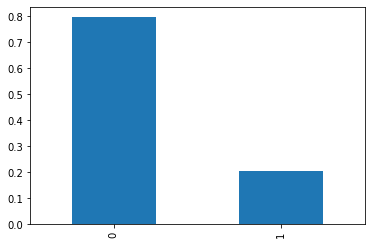

In [365]:
class_frequency = data['exited'].value_counts(normalize=1)
print(class_frequency)
class_frequency.plot(kind='bar')

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Из полученных данных видно, что в целевом признаке наблюдается достаточно сильный дисбаланс классов. Классы отличаются в 4 раза. Как раз это число(при уменьшении выборки - 0.25) будем использовать </font>
</div>

Используем три способа борьбы с дисбалансом

Взвешивание классов

Увеличение выборки

Уменьшение выборки

# Взвешивание классов

# DecisionTreeClassifier

In [366]:
best_f1 = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1
model = DecisionTreeClassifier(random_state=12345,max_depth=best_depth, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_depth =', best_depth) 
print('best_f1 = ', best_f1)
print('auc_roc=',auc_roc)

best_depth = 5
best_f1 =  0.5963791267305644
auc_roc= 0.8310244134068074


# RandomForestClassifier

In [367]:
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(2,25):
    for depth in range(2,25):
        model = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth,class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        if best_f1 < f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
model = RandomForestClassifier(random_state = 12345,n_estimators = best_est, max_depth = best_depth,class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_f1 = ',best_f1)
print('best_depth = ', best_depth)
print('best_est = ',best_est)
print('auc_roc=',auc_roc)

best_f1 =  0.6283367556468172
best_depth =  6
best_est =  19
auc_roc= 0.8469164161409155


# LogisticRegression

In [368]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'liblinear' ,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)
f1= f1_score(predicted_valid, target_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc=',auc_roc)
print('f1 =', f1)

auc_roc= 0.7637310291013133
f1 = 0.4888507718696398


# Увеличение выборки

Напишем общую функцию для разделения на положительные и отрицательные объекты

In [369]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Отлично! Красивая функция. Ну и здорово что ты понимаешь, что применение функций упрощает код, делает его структурированным, простым для понимания и упрощает его дальнейшее переиспользование (принцип DRY (Don’t Repeat Yourself / Не повторяйся) – в действии). Дополнительно о DRY можно почитать здесь: https://habr.com/ru/company/itelma/blog/546372</div>

# DecisionTreeClassifier

In [370]:
best_f1 = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1
model = DecisionTreeClassifier(random_state=12345,max_depth=best_depth)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_depth =', best_depth) 
print('best_f1 = ', best_f1)
print('auc_roc=',auc_roc)

best_depth = 5
best_f1 =  0.5963791267305644
auc_roc= 0.8310244134068074


# RandomForestClassifier

In [371]:
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(2,25):
    for depth in range(2,25):
        model = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth)
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        if best_f1 < f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
model = RandomForestClassifier(random_state = 12345,n_estimators = best_est, max_depth = best_depth)
model.fit(features_upsampled, target_upsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_f1 = ',best_f1)
print('best_depth = ', best_depth)
print('best_est = ',best_est)
print('auc_roc=',auc_roc)

best_f1 =  0.6198547215496367
best_depth =  14
best_est =  17
auc_roc= 0.8331891676092888


# LogisticRegression

In [372]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1= f1_score(predicted_valid, target_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc=',auc_roc)
print('f1 =', f1)

auc_roc= 0.7636478565682107
f1 = 0.4888507718696398


# Уменьшение выборки

In [373]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

# DecisionTreeClassifier

In [374]:
best_f1 = 0
best_depth = 0
for depth in range(1, 50):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1
model = DecisionTreeClassifier(random_state=12345,max_depth=best_depth)
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_depth =', best_depth) 
print('best_f1 = ', best_f1)
print('auc_roc=',auc_roc)

best_depth = 5
best_f1 =  0.5953109072375127
auc_roc= 0.8240212861195628


# RandomForestClassifier

In [375]:
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(2,25):
    for depth in range(2,25):
        model = RandomForestClassifier(random_state = 12345,n_estimators = est, max_depth = depth)
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid,predicted_valid)
        if best_f1 < f1:
            best_depth = depth
            best_est = est
            best_f1 = f1
model = RandomForestClassifier(random_state = 12345,n_estimators = best_est, max_depth = best_depth)
model.fit(features_downsampled, target_downsampled)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('best_f1 = ',best_f1)
print('best_depth = ', best_depth)
print('best_est = ',best_est)
print('auc_roc=',auc_roc)

best_f1 =  0.6013579049466536
best_depth =  5
best_est =  9
auc_roc= 0.8391216375613209


# LogisticRegression

In [376]:
model = LogisticRegression(random_state = 12345,max_iter= 1000,solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1= f1_score(predicted_valid, target_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc=roc_auc_score(target_valid,probabilities_one_valid)
print('auc_roc=',auc_roc)
print('f1 =', f1)

auc_roc= 0.7622883637089505
f1 = 0.48406546080964685


# Вывод

За счет использования взвешивания классов получается достичь наилучшего значния f1 у каждой модели, при этом гиперпараметры слегка именяются. В свою очередь уменьшение и увеличение выборки позволяет увеличить значение у логистической регресии и дерева решений, но у случайного леса значение f1 уменьшается

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>после того как исправил ошибку, связанную с тем что не исследовал во сколько раз один класс, больше другого. Мысль, что уменьшение и увеличение выборки уменьшают значение f1 у случайного леса, не верна! </font>
</div>

Наибольшее значние f1 в 0,628 достигается при использовании взвешивания классов и метода случаного леса

Значение AUC-ROC у всех моделей примерно одно и то же:
    
    у дерева решений 0.80-0.83
    
    у случайного леса 0.80-0.84
    
    у логистической регрессии порядка 0.76

Наибольшее значение AUC-ROC в 0.84, так же как и f1, достигается при взвешивании классов и модели случайного леса

## Тестирование модели

Модель случайного леса проявила себя лучше всего, поэтому тестирования будем проводить при помощи именно этой модели с гиперпараметрами best_depth =  6, best_est =  19

In [380]:
model = RandomForestClassifier(random_state = 12345,n_estimators = 19, max_depth = 6,class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('f1=',f1_score(target_test,predicted_test))
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test,probabilities_one_test)
print('auc_roc=',auc_roc)

f1= 0.5889447236180904
auc_roc= 0.8421817167887675


значение f1 не достигло необходимого 0.59, попробуем увеличить гиперпараметры

In [378]:
best_f1 = 0
best_est = 0
best_depth = 0
for est in range(10, 101, 5):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345,n_estimators=est,max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid)
        if f1_forest > best_f1:
            best_est = est
            best_depth = depth

print('best_est =', best_est)
print('best_depth =', best_depth)

best_est = 100
best_depth = 9


In [379]:
model = RandomForestClassifier(random_state = 12345,n_estimators = 100, max_depth = 9,class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('f1=',f1_score(target_test,predicted_test))
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test,probabilities_one_test)
print('auc_roc=',auc_roc)

f1= 0.6042841037204059
auc_roc= 0.8591829055677731


успешно

# Вывод

Были проверены три модели: дерево решений, случайный лес и логистическая регрессия, а также три способа борьбы с дисбалансом: взвешивание классов, уменьшение и увеличение выборки.

При дисбалансе значение самое больше f1 имела модель случайного леса в 0.6.

После того как учли дисбаланс, нашли лучший для наших условий способ решения: использование взвешивания классов. И все так же, как и раньше модель случайного дерева имела лучший результат f1

При тестировании использовали модель случайного леса с гиперпараматреми n_estimators = 100, max_depth = 9 и взвешивание классов. В результате получили значение f1 в 0.6 и значение AUC-ROC равное 0.86

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*